# Convolution

**Astropy** provides comprehensive methods for convolution (with added benefits over those in the base `scipy` package). In this introductory notebook we'll use these methods to smooth some one and two dimensional datasets.

We first load our typical scientific libraries, the `fits` sublibrary, and the `convolve` and `convolve_fft` libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from astropy.io import fits
from astropy.convolution import convolve, convolve_fft

### Smoothing 1D data

To demonstrate 1D convolution we'll use the 3C 273 quasar spectral data from the modelling notebook. The code below loads the data, renormalises it, and creates an array of wavelength values.

In [69]:
hdu = fits.open('../data/3C_273-S-B-bcc2009.fits')[0]
flux = hdu.data / 10000

a = hdu.header['CRVAL1']
b = hdu.header['CRVAL1'] + hdu.header['CDELT1']*len(flux)

x = np.linspace(a, b, len(flux))

We now have to create an instance of our convolution kernel. `Box1DKernel` instantiates a simple box kernel, with width specified by the first argument

In [78]:
box_kernel = Box1DKernel(3)

We can check the shape of our kernel by plotting it

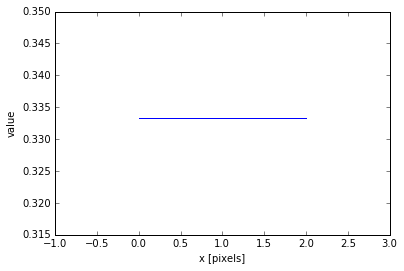

In [79]:
plt.plot(box_kernel, drawstyle='steps')
plt.xlim(-1, 3)
plt.xlabel('x [pixels]')
plt.ylabel('value')
plt.show()

We now apply the kernel to our data through the `convolve` function, passing the data as the first argument and the kernel as the second. 

In [81]:
smoothed_data_box = convolve(flux, box_kernel)

Comparing the original data to the convolved, we can see that the data has been smoothed, especially around sharp lines in the spectra.

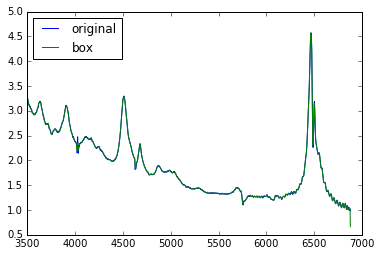

In [84]:
plt.plot(x,flux)
plt.plot(x,smoothed_data_box)
plt.legend(['original','box'],loc=2)

To change kernel just instantiate it and convolve again. Below we choose a Gaussian filter with standard deviation 5.

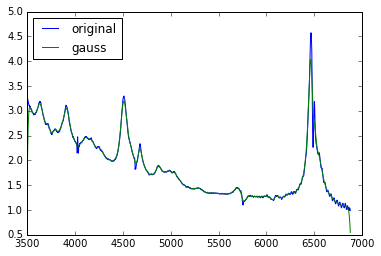

In [85]:
gauss_kernel = Gaussian1DKernel(5)
smoothed_data_gauss = convolve(flux, gauss_kernel)

plt.plot(x,flux)
plt.plot(x,smoothed_data_gauss)
plt.legend(['original','gauss'],loc=2)

### 2D convolution

Two dimensional convolution proceeds similarly to one dimensional, only with a two dimensional kernel. Below we load an image of M51 and convolve it with a Gaussian. Note the keyword argument `boundary` in the call to convolve, which computes values beyond the edges of the image by extrapolating nearby values, then convolves over this extended image.

In [88]:
data = fits.getdata('../data/MESSIER_051-I-103aE-dss1.fits')

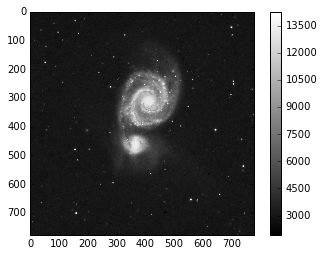

In [89]:
plt.imshow(data, cmap='gray')
plt.colorbar()

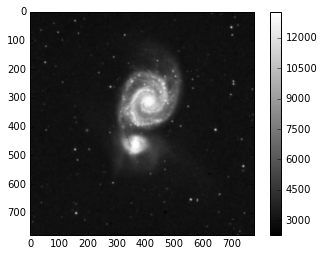

In [90]:
from astropy.convolution import Gaussian2DKernel

gauss = Gaussian2DKernel(stddev=2)
cdata = convolve(data, gauss, boundary='extend')

plt.imshow(cdata, cmap='gray',)
plt.colorbar()